### Code References


VADER implementation: https://medium.com/@rslavanyageetha/vader-a-comprehensive-guide-to-sentiment-analysis-in-python-c4f1868b0d2e#:~:text=Sentiment%20analysis%20is%20a%20popular,trained%20model%20for%20sentiment%20analysis.

TextBlob implementation: https://betterprogramming.pub/a-step-by-step-guide-to-using-textblob-for-nlp-with-python-157a7365a17b

FinBERT implementation: https://huggingface.co/ProsusAI/finbert




In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/financial_news/stock_news_api/financial_news_data_stocknewsapi_alltickers.csv")
df.head(2)

,ticker,date,title,text,source,url,type,sentiment
0,AAPL,"Fri, 30 Dec 2022 19:51:00 -0500","Tesla, Apple, Southwest Airlines: Stocks That ...",Here are seven major companies whose stocks mo...,WSJ,https://www.wsj.com/articles/tesla-apple-south...,Article,Neutral
1,AAPL,"Fri, 30 Dec 2022 14:52:52 -0500","Streaming ad services will have a price war, s...","Mark Douglas, MNTN Founder, joins 'The Exchang...",CNBC Television,https://www.youtube.com/watch?v=_OlMFW4QDx8,Video,Neutral


In [39]:
df["concat_text"] = df["text"] + ' ' + df["title"]
df.head(3)

,ticker,date,title,text,source,url,type,sentiment,concat_text
0,AAPL,"Fri, 30 Dec 2022 19:51:00 -0500","Tesla, Apple, Southwest Airlines: Stocks That ...",Here are seven major companies whose stocks mo...,WSJ,https://www.wsj.com/articles/tesla-apple-south...,Article,Neutral,Here are seven major companies whose stocks mo...
1,AAPL,"Fri, 30 Dec 2022 14:52:52 -0500","Streaming ad services will have a price war, s...","Mark Douglas, MNTN Founder, joins 'The Exchang...",CNBC Television,https://www.youtube.com/watch?v=_OlMFW4QDx8,Video,Neutral,"Mark Douglas, MNTN Founder, joins 'The Exchang..."
2,AAPL,"Fri, 30 Dec 2022 12:31:20 -0500",Apple CEO Cook conveyed app store curb concern...,Apple Inc Chief Executive Tim Cook asked Japan...,Reuters,https://www.reuters.com/technology/apple-ceo-c...,Article,Negative,Apple Inc Chief Executive Tim Cook asked Japan...


### Text preprocessing

First we will perform text preprocessing using the following steps:

1. Converting the text to lowercase to avoid duplicates.
2. Remove punctation as it wouldn't make any difference in the analysis.
3. Tokenization: Converting the article text into an array of words/tokens.
4. Remove the stopwords that wouldn't make a difference to the sentiment analysis e.g. is, be, was, etc.
5. Lemmatization or Stemming: Converting each word to its root word e.g. running->run, better->good.
6. Add new columns to the dataset with the processed text 

The sentiment analysis functions get_vader_label, get_textblob_label, and get_finbert_label from the SentimentAnalysisVader module are applied to the preprocessed text column. These functions assign sentiment labels using VADER, TextBlob, and FinBERT. The resulting sentiment labels are stored in new columns.

In [40]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../')
from utils.SentimentAnalysis import preprocess_text, get_vader_label, get_textblob_label, get_finbert_label

df["processed_text"] = df["concat_text"].apply(preprocess_text)


df["VADER_label"] = df["processed_text"].apply(get_vader_label)
df['TextBlob_label'] = df['processed_text'].apply(get_textblob_label)
df["finbert_label"] = df["processed_text"].apply(get_finbert_label)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 1.0, 'Count')

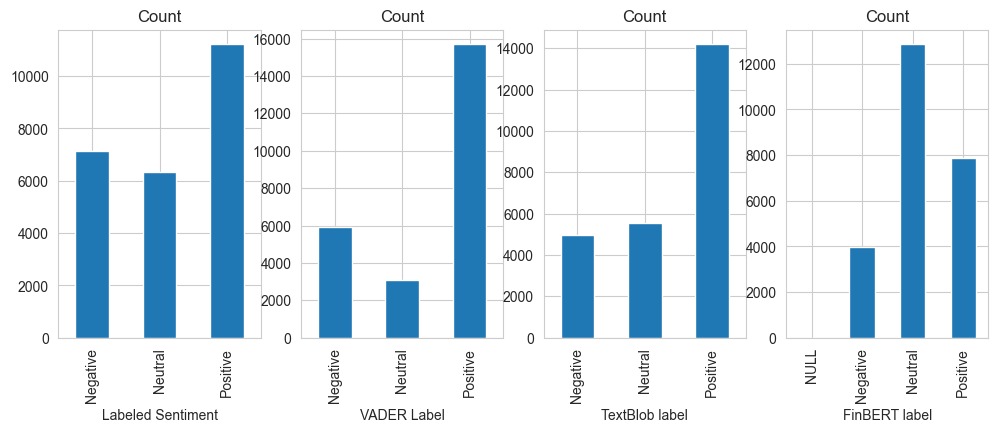

In [41]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
df["sentiment"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Labeled Sentiment")
plt.title("Count")

plt.subplot(1, 4, 2)
df["VADER_label"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("VADER Label")
plt.title("Count")

plt.subplot(1, 4, 3)
df["TextBlob_label"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("TextBlob label")
plt.title("Count")

plt.subplot(1, 4, 4)
df["finbert_label"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("FinBERT label")
plt.title("Count")

The following code snippet calculates evaluation metrics for different sentiment analysis models applied to a DataFrame containing financial news data.

A function is defined to calculate evaluation metrics such as accuracy, precision, recall, and F1-score. Evaluation metrics are computed for each sentiment analysis model using the actual and predicted labels.

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get true labels from the "Sentiment" column
true_labels = df['sentiment']
# Get predicted labels from each model's output columns
vader_predicted_labels = df['VADER_label']
textblob_predicted_labels = df['TextBlob_label']
finbert_predicted_labels = df['finbert_label']

# Define a function to calculate evaluation metrics
def calculate_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    return accuracy, precision, recall, f1

# Calculate metrics for each model
vader_accuracy, vader_precision, vader_recall, vader_f1 = calculate_metrics(true_labels, vader_predicted_labels)
textblob_accuracy, textblob_precision, textblob_recall, textblob_f1 = calculate_metrics(true_labels, textblob_predicted_labels)
finbert_accuracy, finbert_precision, finbert_recall, finbert_f1 = calculate_metrics(true_labels, finbert_predicted_labels)

# Print metrics for each model
print("VADER model metrics:")
print("Accuracy:", vader_accuracy)
print("Precision:", vader_precision)
print("Recall:", vader_recall)
print("F1-score:", vader_f1)
print()

print("TextBlob model metrics:")
print("Accuracy:", textblob_accuracy)
print("Precision:", textblob_precision)
print("Recall:", textblob_recall)
print("F1-score:", textblob_f1)
print()

print("FinBERT model metrics:")
print("Accuracy:", finbert_accuracy)
print("Precision:", finbert_precision)
print("Recall:", finbert_recall)
print("F1-score:", finbert_f1)

print("Accuracy of FinBERT model:", finbert_accuracy)


VADER model metrics:
Accuracy: 0.5422018720369545
Precision: 0.5173096693187389
Recall: 0.5422018720369545
F1-score: 0.5118597219410541

TextBlob model metrics:
Accuracy: 0.4563799181490336
Precision: 0.44120638346187274
Recall: 0.4563799181490336
F1-score: 0.4412132577778738

FinBERT model metrics:
Accuracy: 0.5206450828639734
Precision: 0.6241299815203376
Recall: 0.5206450828639734
F1-score: 0.5355687181609934
Accuracy of FinBERT model: 0.5206450828639734


c:\Users\omare\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Plotting the evaluation metrics

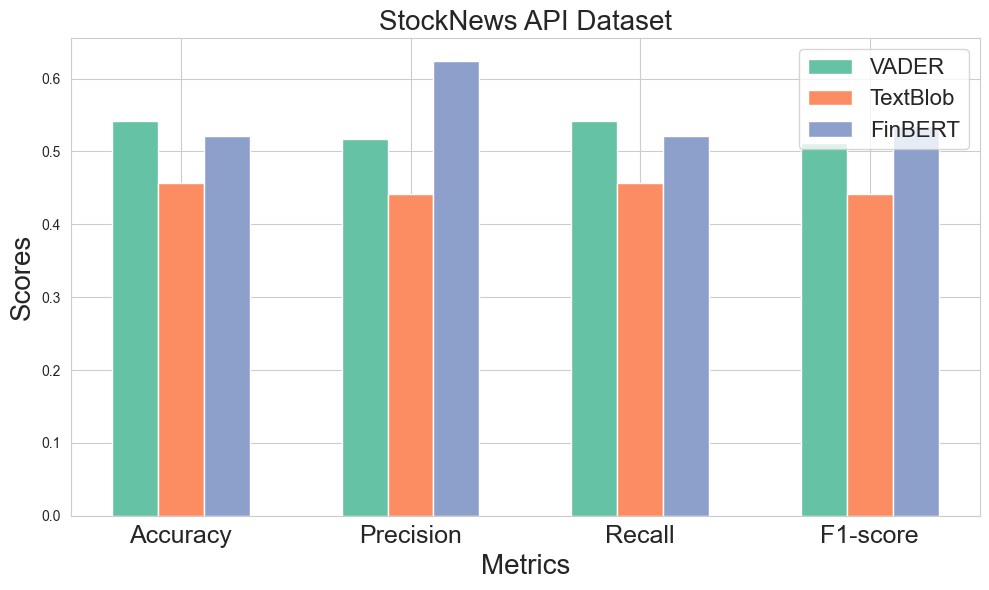

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define model names and corresponding metrics
models = ['VADER', 'TextBlob', 'FinBERT']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = {
    'VADER': [vader_accuracy, vader_precision, vader_recall, vader_f1],
    'TextBlob': [textblob_accuracy, textblob_precision, textblob_recall, textblob_f1],
    'FinBERT': [finbert_accuracy, finbert_precision, finbert_recall, finbert_f1]
}

sns.set_style("whitegrid")
color_palette = sns.color_palette("Set2")
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(metrics))

for i, model in enumerate(models):
    ax.bar(index + i * bar_width, scores[model], bar_width, label=model, color=color_palette[i])

ax.set_xlabel('Metrics', fontsize=20)  
ax.set_ylabel('Scores', fontsize=20) 
ax.set_title('StockNews API Dataset', fontsize=20) 
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=18) 
ax.legend(fontsize=16) 

plt.tight_layout()
plt.show()


In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this number as needed

# Define the features (processed_text) and target (sentiment) columns
X = df['processed_text']
y = df['sentiment']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define lists to store evaluation metrics for each fold
vader_accuracies = []
textblob_accuracies = []
finbert_accuracies = []

vader_precisions = []
vader_recalls = []
vader_f1_scores = []

textblob_precisions = []
textblob_recalls = []
textblob_f1_scores = []

finbert_precisions = []
finbert_recalls = []
finbert_f1_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply VADER model
    vader_predicted_labels = X_test.apply(get_vader_label)
    
    # Calculate metrics for VADER model and append to the lists
    vader_accuracies.append(accuracy_score(y_test, vader_predicted_labels))
    vader_precisions.append(precision_score(y_test, vader_predicted_labels, average='weighted'))
    vader_recalls.append(recall_score(y_test, vader_predicted_labels, average='weighted'))
    vader_f1_scores.append(f1_score(y_test, vader_predicted_labels, average='weighted'))
    
    # Apply TextBlob model
    textblob_predicted_labels = X_test.apply(get_textblob_label)
    
    # Calculate metrics for TextBlob model and append to the lists
    textblob_accuracies.append(accuracy_score(y_test, textblob_predicted_labels))
    textblob_precisions.append(precision_score(y_test, textblob_predicted_labels, average='weighted'))
    textblob_recalls.append(recall_score(y_test, textblob_predicted_labels, average='weighted'))
    textblob_f1_scores.append(f1_score(y_test, textblob_predicted_labels, average='weighted'))
    
    # Apply FinBERT model
    finbert_predicted_labels = X_test.apply(get_finbert_label)
    
    # Calculate metrics for FinBERT model and append to the lists
    finbert_accuracies.append(accuracy_score(y_test, finbert_predicted_labels))
    finbert_precisions.append(precision_score(y_test, finbert_predicted_labels, average='weighted'))
    finbert_recalls.append(recall_score(y_test, finbert_predicted_labels, average='weighted'))
    finbert_f1_scores.append(f1_score(y_test, finbert_predicted_labels, average='weighted'))

# Calculate mean and standard deviation across all folds for each model
mean_vader_accuracy = np.mean(vader_accuracies)
std_vader_accuracy = np.std(vader_accuracies)
mean_vader_precision = np.mean(vader_precisions)
mean_vader_recall = np.mean(vader_recalls)
mean_vader_f1 = np.mean(vader_f1_scores)

mean_textblob_accuracy = np.mean(textblob_accuracies)
std_textblob_accuracy = np.std(textblob_accuracies)
mean_textblob_precision = np.mean(textblob_precisions)
mean_textblob_recall = np.mean(textblob_recalls)
mean_textblob_f1 = np.mean(textblob_f1_scores)

mean_finbert_accuracy = np.mean(finbert_accuracies)
std_finbert_accuracy = np.std(finbert_accuracies)
mean_finbert_precision = np.mean(finbert_precisions)
mean_finbert_recall = np.mean(finbert_recalls)
mean_finbert_f1 = np.mean(finbert_f1_scores)

# Calculate standard deviation for precision, recall, and F1-score for each model
std_vader_precision = np.std(vader_precisions)
std_vader_recall = np.std(vader_recalls)
std_vader_f1 = np.std(vader_f1_scores)

std_textblob_precision = np.std(textblob_precisions)
std_textblob_recall = np.std(textblob_recalls)
std_textblob_f1 = np.std(textblob_f1_scores)

std_finbert_precision = np.std(finbert_precisions)
std_finbert_recall = np.std(finbert_recalls)
std_finbert_f1 = np.std(finbert_f1_scores)

# Print mean metrics and standard deviation for each model
print("VADER model metrics:")
print("Accuracy:", mean_vader_accuracy, "+/-", std_vader_accuracy)
print("Precision:", mean_vader_precision, "+/-", std_vader_precision)
print("Recall:", mean_vader_recall, "+/-", std_vader_recall)
print("F1-score:", mean_vader_f1, "+/-", std_vader_f1)
print()

print("TextBlob model metrics:")
print("Accuracy:", mean_textblob_accuracy, "+/-", std_textblob_accuracy)
print("Precision:", mean_textblob_precision, "+/-", std_textblob_precision)
print("Recall:", mean_textblob_recall, "+/-", std_textblob_recall)
print("F1-score:", mean_textblob_f1, "+/-", std_textblob_f1)
print()

print("FinBERT model metrics:")
print("Accuracy:", mean_finbert_accuracy, "+/-", std_finbert_accuracy)
print("Precision:", mean_finbert_precision, "+/-", std_finbert_precision)
print("Recall:", mean_finbert_recall, "+/-", std_finbert_recall)
print("F1-score:", mean_finbert_f1, "+/-", std_finbert_f1)



c:\Users\omare\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


VADER model metrics:
Accuracy: 0.5422019396399548 +/- 0.006175285787679555
Precision: 0.5173642706565852 +/- 0.00618571641240725
Recall: 0.5422019396399548 +/- 0.006175285787679555
F1-score: 0.5118521845766903 +/- 0.005734015655744017

TextBlob model metrics:
Accuracy: 0.4563799983250654 +/- 0.0043071762746994076
Precision: 0.44121719168376466 +/- 0.0059840506017979755
Recall: 0.4563799983250654 +/- 0.0043071762746994076
F1-score: 0.44118370152498054 +/- 0.00556413773068889

FinBERT model metrics:
Accuracy: 0.5206454902385798 +/- 0.008383171243080351
Precision: 0.6242632154692853 +/- 0.01069244500763381
Recall: 0.5206454902385798 +/- 0.008383171243080351
F1-score: 0.5355499618837618 +/- 0.00836376058713082


c:\Users\omare\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
